In [140]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
from altair import Chart

In [141]:
# Anger önskad period för tidsserien
end = dt.datetime.today()
d = dt.timedelta(days=365)
start = end - d * 10

In [142]:
# Väljer aktier att hämta tidsserie för ifrån Google Finance
aktie1 = 'STAR-B.ST'
aktie1_ts = pdr.DataReader(aktie1, 'google', start, end)
aktie2 = 'MSFT'
aktie2_ts = pdr.DataReader(aktie2, 'google', start, end)

In [143]:
# Skapar en Pandas Data Frame med datum, priser och symboler
data1 = pd.DataFrame({'date': aktie1_ts.index,
                     'price': aktie1_ts['Close'].values,
                     'symbol': aktie1})
data2 = pd.DataFrame({'date': aktie2_ts.index,
                     'price': aktie2_ts['Close'].values,
                     'symbol': aktie2})
data3 = [data1, data2]
data = pd.concat(data3)

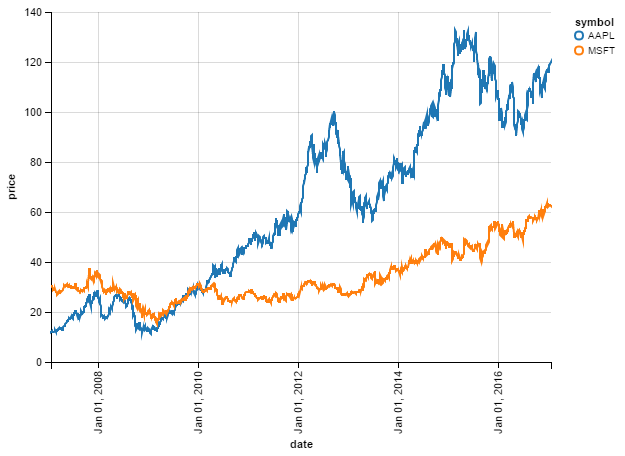

In [144]:
# Altair Chart anropas för att rita grafen
chart = Chart(data).mark_line().encode(
    color='symbol:N',
    x='date:T',
    y='price:Q',
)
chart

In [145]:
print(chart.to_json(data=False, indent=2))

{
  "encoding": {
    "color": {
      "field": "symbol", 
      "type": "nominal"
    }, 
    "x": {
      "field": "date", 
      "type": "temporal"
    }, 
    "y": {
      "field": "price", 
      "type": "quantitative"
    }
  }, 
  "mark": "line"
}
